## RFM Analysis: Overview

RFM Analysis is a concept used by Data Science professionals, especially in the marketing domain for understanding and segmenting customers based on their buying behaviour.siness.

Using RFM Analysis, a business can assess customers

- recency (the date they made their last purchase)
- frequency (how often they make purchases)
- and monetary value (the amount spent on purchases)

Recency, Frequency, and Monetary value of a customer are three key metrics that provide information about customer engagement, loyalty, and value to a business.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from datetime import datetime
import warnings as w
plt.style.use("ggplot")
sns.set_style("whitegrid")
w.filterwarnings("ignore")

In [2]:
# Fecthing data from Mysql 

connection = pymysql.connect(  
                               user="root",
                               password='Areeb@123',
                               host="localhost",
                               database="customerdb",
                               port = 3306
                             )

In [3]:
query = "select * from customers"

In [4]:
data = pd.read_sql( query, connection)

In [5]:
connection.close()

In [6]:
df = data.copy()

In [7]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [9]:
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [10]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Calculating RFM Values

In [12]:
# I’ll now calculate the Recency, Frequency, and Monetary values of the customers to move further:

# Converting PurchaseDate column to datetime 
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])


In [13]:
# Calculating recency 
df["Recency"] = (datetime.now().date() - df['PurchaseDate'].dt.date)

In [14]:
df["Recency"] = df["Recency"].astype("str")

In [15]:
df["Recency"] = df["Recency"].str.split().str[0]

In [16]:
df.head(1)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,648


In [17]:
# Calculating Frequency

freq = df.groupby("CustomerID")["OrderID"].count().reset_index()
freq.rename(columns={'OrderID': 'Frequency'}, inplace=True)

In [18]:
df = df.merge(freq, on='CustomerID', how='left')
df.head(2)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,648,1
1,2188,2023-04-11,463.70,Product A,176819,London,648,1


In [19]:
# Calculate Monetary Value

monetory = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetory = monetory.rename( columns = {'TransactionAmount': "MonetoryValue"})
df = df.merge( monetory, on = "CustomerID", how = "left")
df.head(2)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetoryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,648,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,648,1,463.70


## Calculating RFM Scores

In [ ]:
df["Recency"] = df["Recency"].astype("int64")

In [25]:
# Now let’s calculate the recency, frequency, and monetary scores:

# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetoryValue'], bins=5, labels=monetary_scores)

**Recency Score**

We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase. It means that customers who have purchased more recently will receive higher recency scores.



**FrequencyScore**

We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. Customers who made more frequent purchases will receive higher frequency scores.

**Monetary Value**

To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

In [34]:
df.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetoryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,648,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,648,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,648,1,80.28,1,1,1,3,Low-Value


In [26]:
# Convert RFM scores to numeric type

df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetoryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   int32         
 10  FrequencyScore      1000 non-null   int32         
 11  MonetaryScore       1000 non-null   int32         
 12  RFM_Score           1000 non-null   int32         
 13  Value Segment       1000 non-null   category     

## RFM Value Segmentation

In [31]:
# Now let’s calculate the final RFM score and the value segment according to the scores:

# Calculate RFM score by combining the individual scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

To calculate the RFM score, we add the scores obtained for recency, frequency and monetary value. For example, if a customer has a recency score of 3, a frequency score of 4, and a monetary score of 5, their RFM score will be 12.

After calculating the RFM scores, we created RFM segments based on the scores. We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”. Segmentation is done using the pd.qcut() function, which evenly distributes scores between segments.

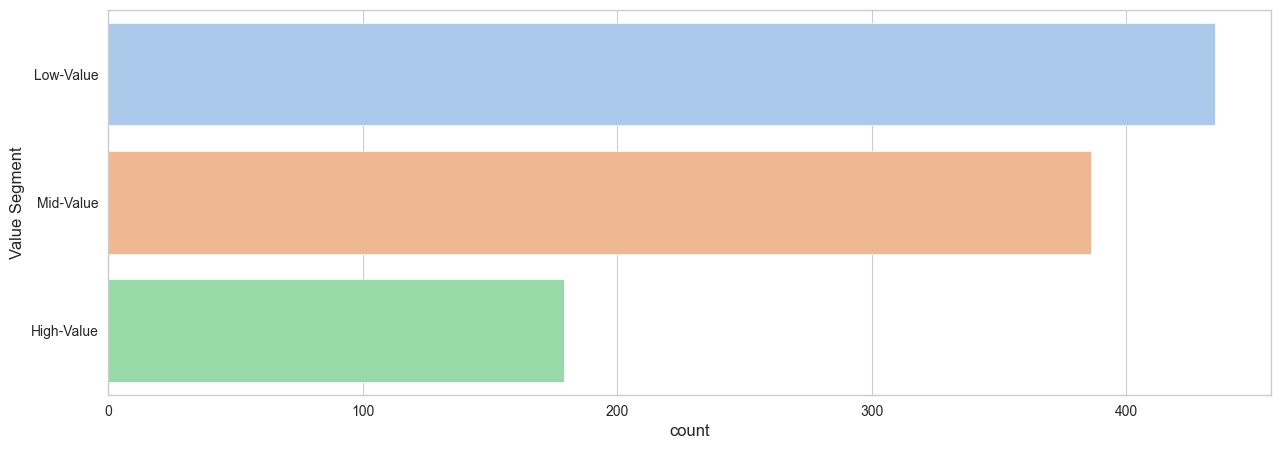

In [163]:
# Now let’s have a look at the segment distribution:

plt.figure( figsize = (15,5))
sns.countplot(df["Value Segment"] , palette = "pastel")
plt.show()

## RFM Customer Segments

Now let’s create and analyze RFM Customer Segments that are broader classifications based on the RFM scores. These segments, such as “Champions”, “Potential Loyalists”, and “Can’t Lose” provide a more strategic perspective on customer behaviour and characteristics in terms of recency, frequency, and monetary aspects. Here’s how to create the RFM customer segments:

In [35]:
# Creating a new column for RFM Customer Segments
df['RFM Customer Segments'] = ''

# Assigning RFM segments based on the RFM score
df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

In [36]:
df.iloc[::,6:].head(3)

,Recency,Frequency,MonetoryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,648,1,943.31,1,1,2,4,Low-Value,Can't Lose
1,648,1,463.70,1,1,1,3,Low-Value,Lost
2,648,1,80.28,1,1,1,3,Low-Value,Lost


In the above code, we are assigning RFM segments to customers based on their RFM scores and then creating a new column called “RFM Customer Segments” in the data.

## RFM Analysis

Now let’s analyze the distribution of customers across different RFM customer segments within each value segment:

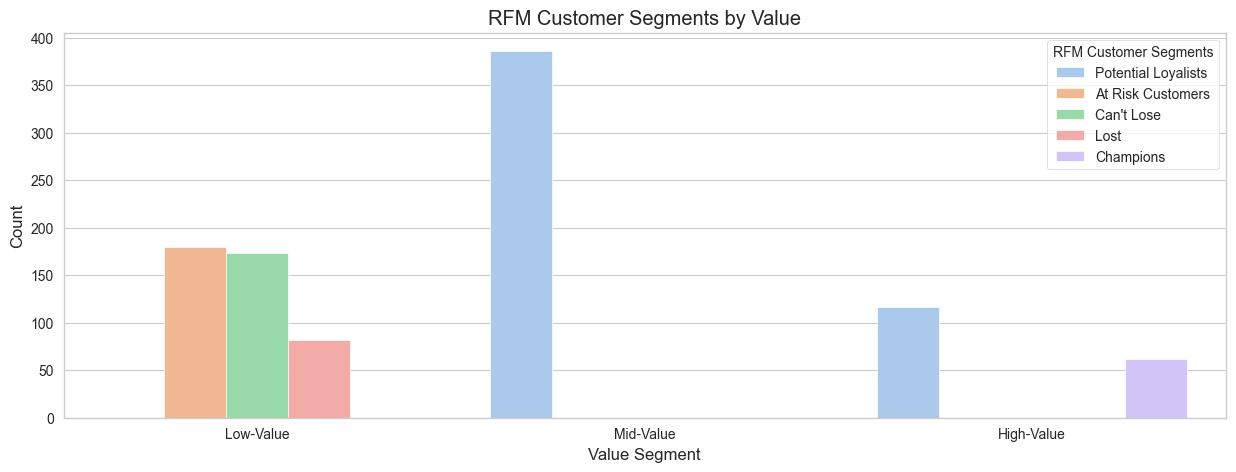

In [37]:
# Group by 'Value Segment' and 'RFM Customer Segments' and counting the occurrences
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

# Sorting the values by 'Count'
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

# bar plot
plt.figure(figsize=(15, 5))
sns.barplot(y='Count', x='Value Segment', hue='RFM Customer Segments', data=segment_product_counts, palette = "pastel")
plt.title('RFM Customer Segments by Value')
plt.ylabel('Count')
plt.xlabel('Value Segment')
plt.legend(title='RFM Customer Segments')
plt.show()


In [38]:
# Now let’s analyze the distribution of RFM values within the Champions segment:

# Filter the data to include only the customers in the Champions segment
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

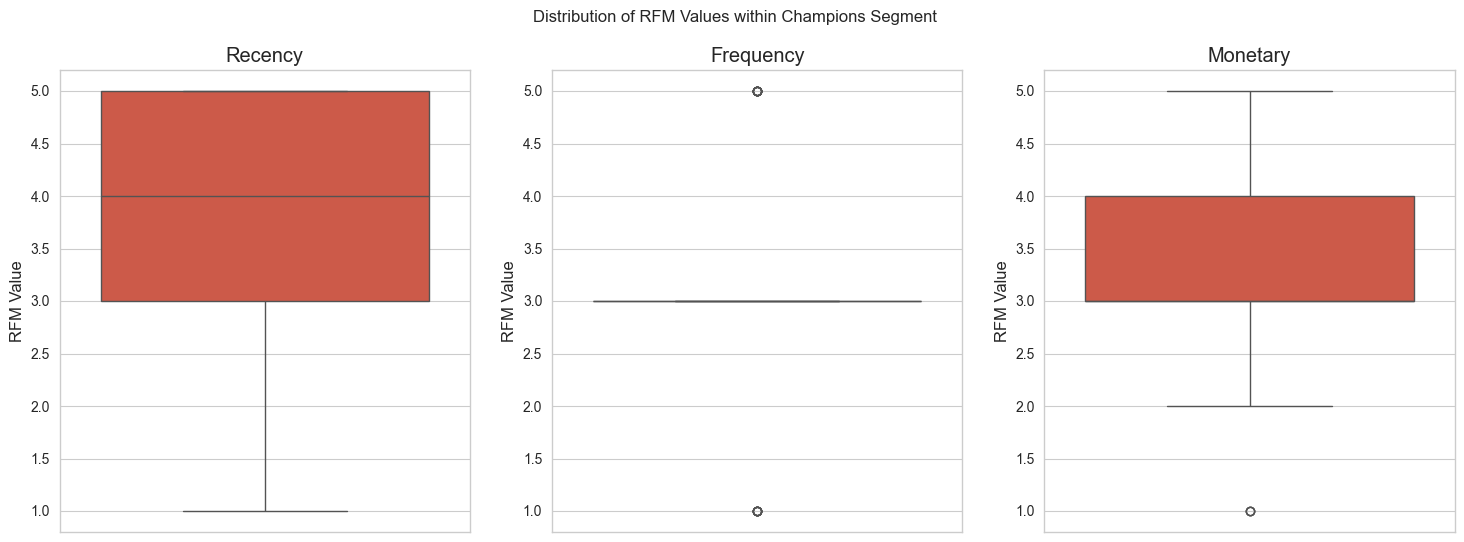

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=champions_segment['RecencyScore'], ax=ax[0]) 
ax[0].set_title('Recency') 
ax[0].set_ylabel('RFM Value') 

sns.boxplot(y=champions_segment['FrequencyScore'], ax=ax[1]) 
ax[1].set_title('Frequency') 
ax[1].set_ylabel('RFM Value') 

sns.boxplot(y=champions_segment['MonetaryScore'], ax=ax[2]) 
ax[2].set_title('Monetary')
ax[2].set_ylabel('RFM Value') 

fig.suptitle('Distribution of RFM Values within Champions Segment') 
 
plt.show()

In [106]:
correlation_matrix["MonetaryScore"]

RecencyScore     -0.474715
FrequencyScore    0.390657
MonetaryScore     1.000000
Name: MonetaryScore, dtype: float64

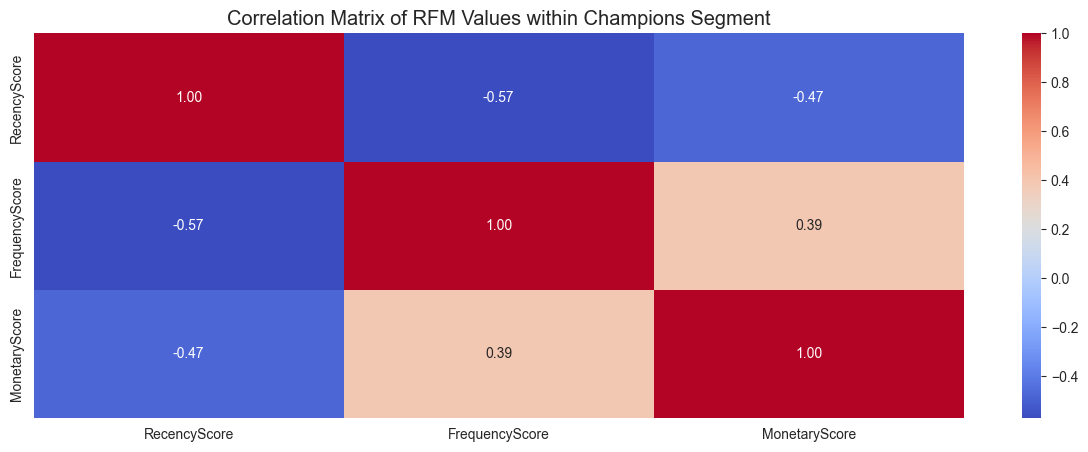

In [105]:
# Now let’s analyze the correlation of the recency, frequency, and monetary scores within the champions segment:

correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

plt.figure( figsize = (15,5))
sns.heatmap( correlation_matrix , annot = True , fmt = "1.2f", cmap = "coolwarm")
plt.title("Correlation Matrix of RFM Values within Champions Segment")
plt.show()

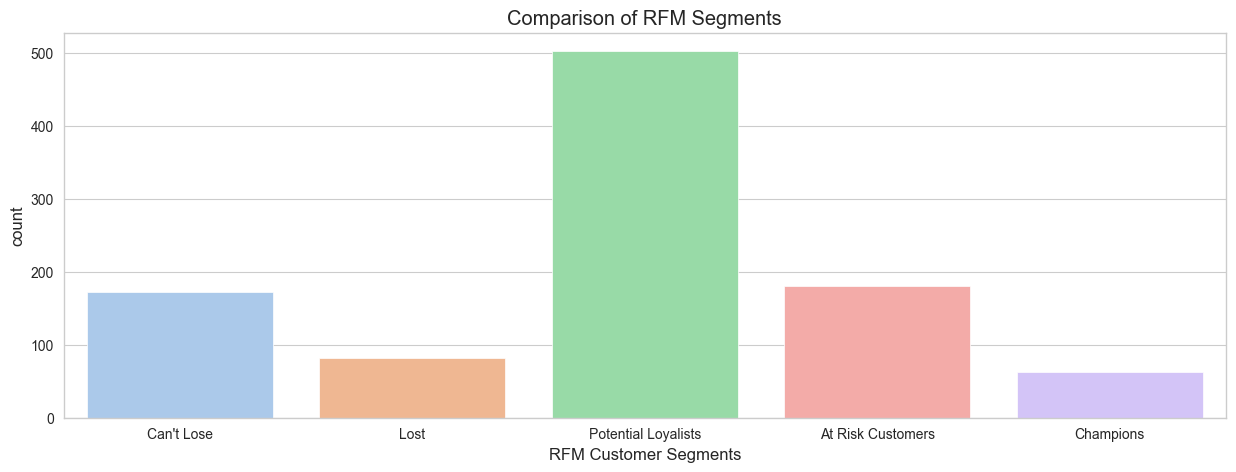

In [41]:
# Now let’s have a look at the number of customers in all the segments:

plt.figure( figsize = (15,5))

sns.countplot( x= df["RFM Customer Segments"] , palette = "pastel")
plt.title('Comparison of RFM Segments')
plt.show()

In [42]:
# Now let’s have a look at the recency, frequency, and monetary scores of all the segments:

segment_scores = df.groupby("RFM Customer Segments")[["RecencyScore", "FrequencyScore", "MonetaryScore"]].mean().reset_index()
segment_scores

,RFM Customer Segments,RecencyScore,FrequencyScore,MonetaryScore
0,At Risk Customers,2.344444,1.011111,1.644444
1,Can't Lose,1.537572,1.000000,1.462428
2,Champions,3.806452,3.064516,3.225806
3,Lost,1.000000,1.000000,1.000000
4,Potential Loyalists,3.918489,1.194831,1.741551


In [43]:
ss = segment_scores.melt( id_vars = "RFM Customer Segments", var_name = "Rs Fs Ms", value_name = "Score")

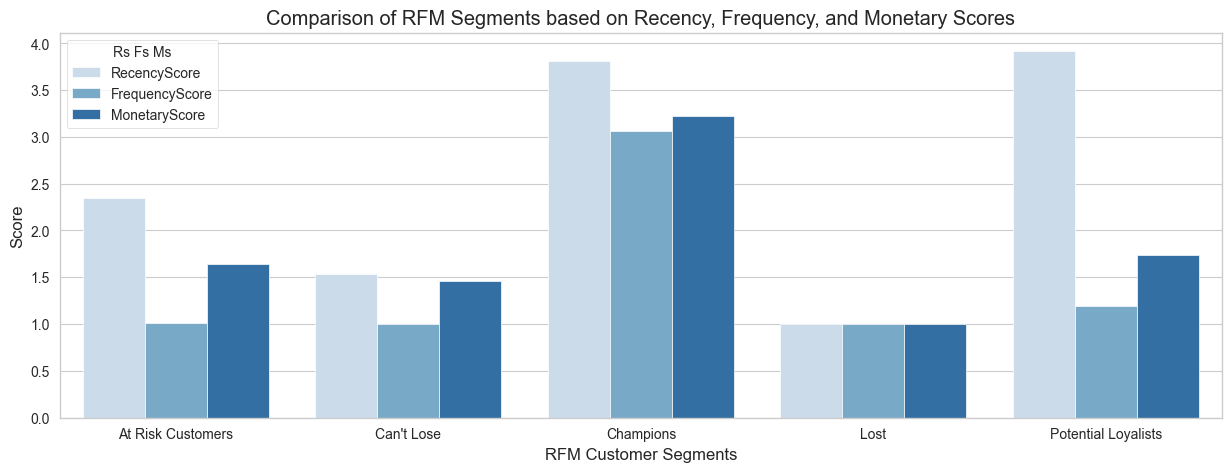

In [44]:
plt.figure( figsize = (15,5))

sns.barplot( data = ss , x = "RFM Customer Segments", y = "Score" , hue = "Rs Fs Ms" , palette = "Blues")

plt.title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')
plt.show()

In [80]:
rfm_segments = df.groupby("RFM Customer Segments")[['Recency', 'Frequency', 'MonetoryValue']].mean()
rfm_segments

,Recency,Frequency,MonetoryValue
RFM Customer Segments,,,
At Risk Customers,626.616667,1.005556,553.820944
Can't Lose,635.549133,1.000000,458.831329
Champions,608.451613,2.032258,1279.259516
Lost,643.000000,1.000000,241.556707
Potential Loyalists,607.351889,1.097416,588.520596


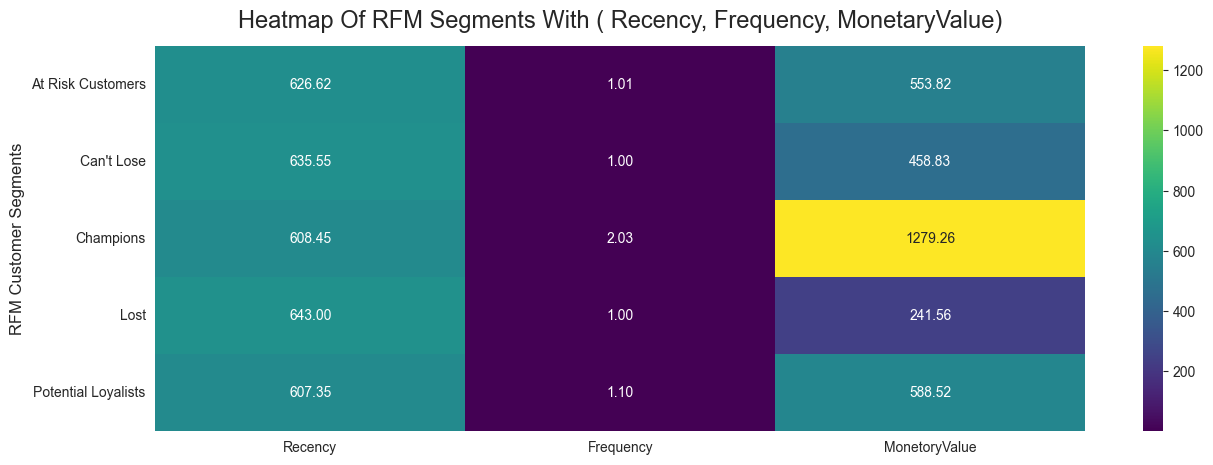

In [104]:
plt.figure( figsize = (15,5))

sns.heatmap(rfm_segments, annot=True, cmap='viridis' , fmt = "1.2f")
plt.title("Heatmap Of RFM Segments With ( Recency, Frequency, MonetaryValue)" , size=17 , y = 1.027)
plt.show()

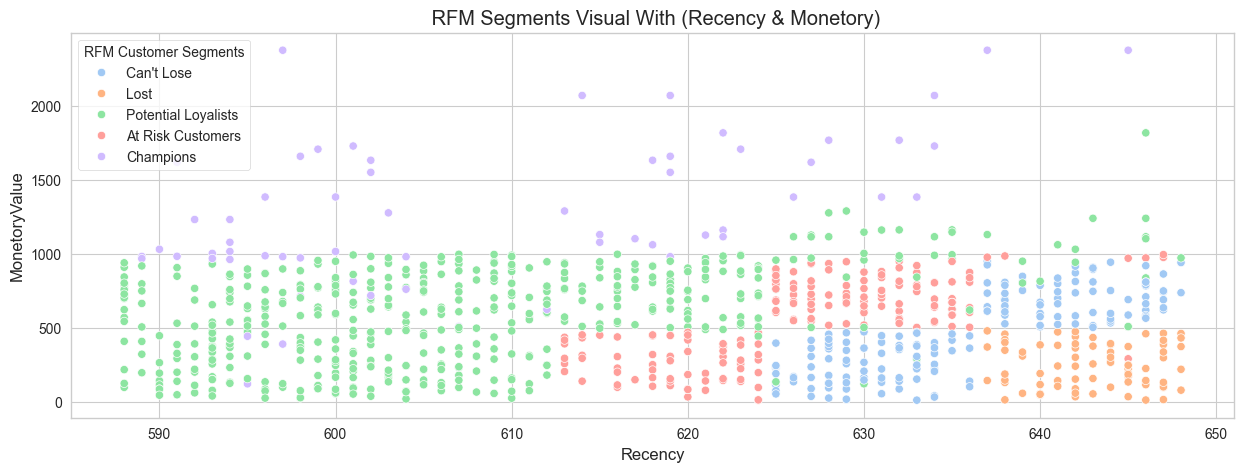

In [165]:
plt.figure( figsize = (15,5))

sns.scatterplot( df , x = "Recency", y = "MonetoryValue", hue = "RFM Customer Segments", palette = "pastel")
plt.title(" RFM Segments Visual With (Recency & Monetory)")
plt.show()

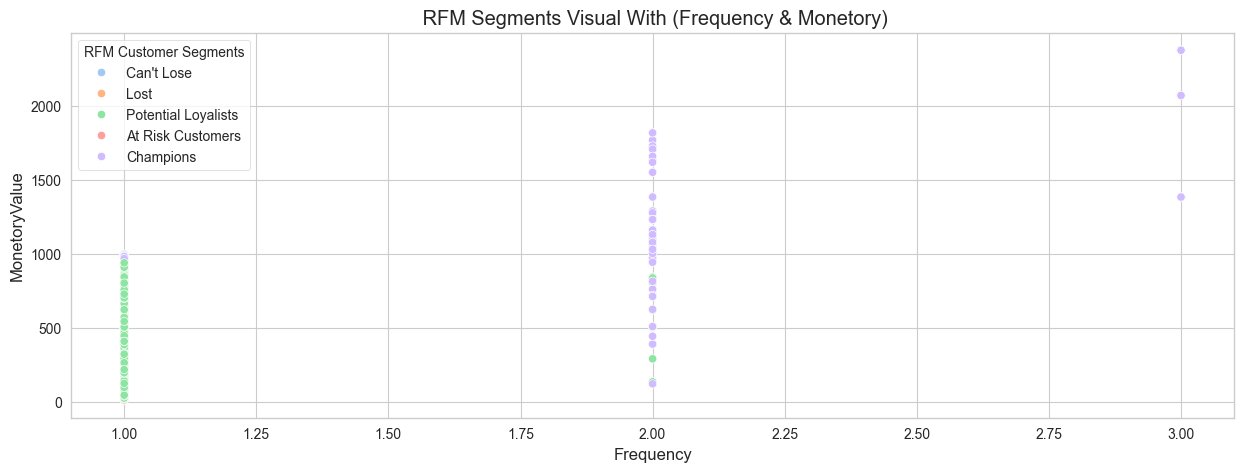

In [164]:
plt.figure( figsize = (15,5))

sns.scatterplot( df , x = "Frequency", y = "MonetoryValue", hue = "RFM Customer Segments", palette = "pastel" )
plt.title(" RFM Segments Visual With (Frequency & Monetory)")
plt.show()

# Customer Segmentation Using Kmeans Clustering

In [46]:
features = df[['Recency', 'Frequency', 'MonetoryValue']]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

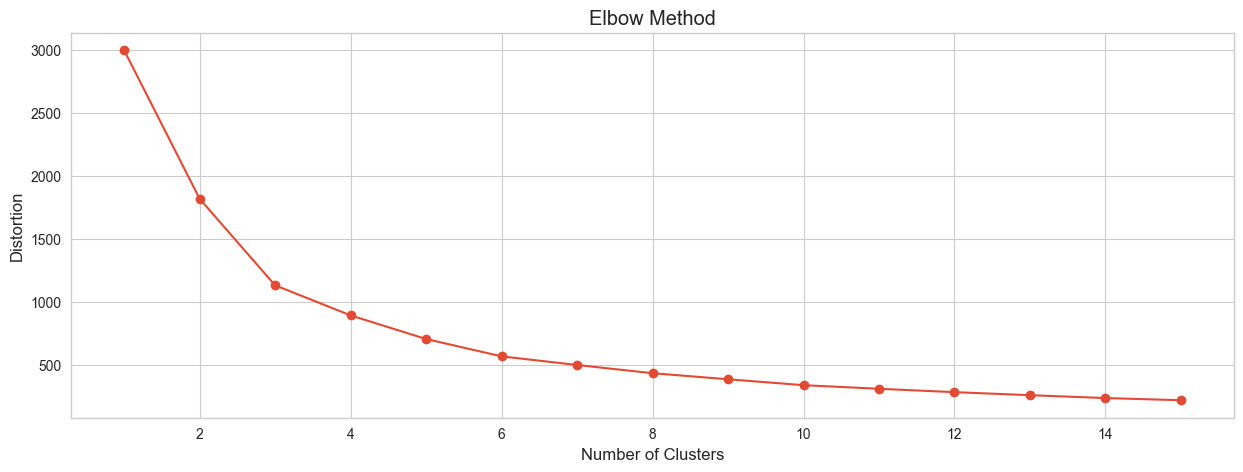

In [49]:
from sklearn.cluster import KMeans

plt.figure( figsize = (15,5))

# Elbow Method
distortions = []
for k in range(1, 16):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


In [74]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [75]:
df['Cluster'].value_counts() 

Cluster
1    369
3    282
0    245
2    104
Name: count, dtype: int64

In [76]:
cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'MonetoryValue']].mean()
cluster_summary

,Recency,Frequency,MonetoryValue
Cluster,,,
0,632.661224,1.000000,259.525755
1,600.574526,1.002710,487.195772
2,621.413462,2.086538,1106.813462
3,629.248227,1.000000,765.055106


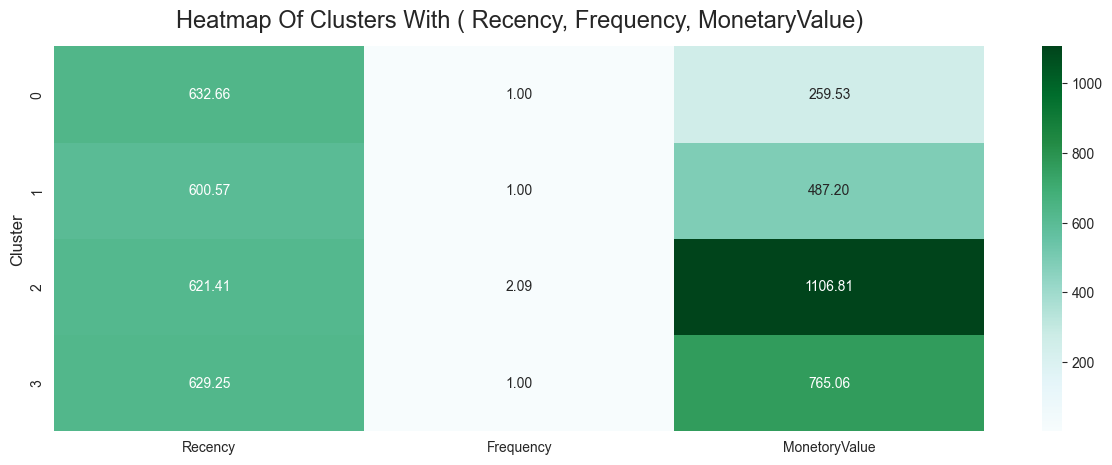

In [107]:
plt.figure( figsize = (15,5))

sns.heatmap(cluster_summary, annot=True, cmap='BuGn' , fmt = "1.2f")
plt.title("Heatmap Of Clusters With ( Recency, Frequency, MonetaryValue)" , size=17 , y = 1.027)
plt.show()

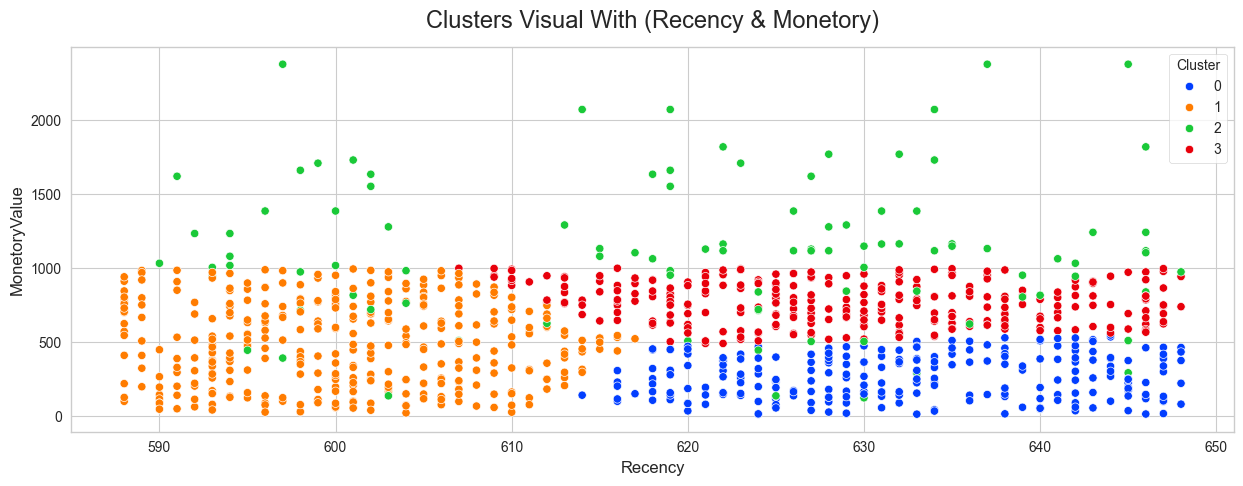

In [161]:
plt.figure( figsize = (15,5))

sns.scatterplot( df , x = "Recency", y = "MonetoryValue", hue = "Cluster" , palette = "bright")
plt.title("Clusters Visual With (Recency & Monetory)", size = 17, y = 1.027)
plt.show()

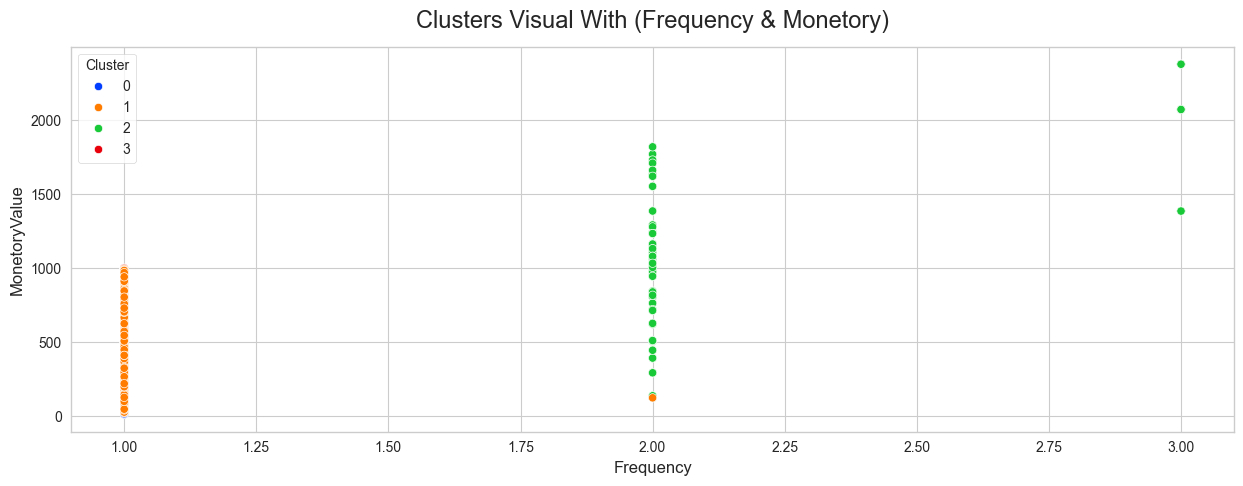

In [162]:
plt.figure( figsize = (15,5))

sns.scatterplot( df , x = "Frequency", y = "MonetoryValue", hue = "Cluster", palette = "bright" )
plt.title("Clusters Visual With (Frequency & Monetory)", size = 17, y = 1.027)
plt.show()

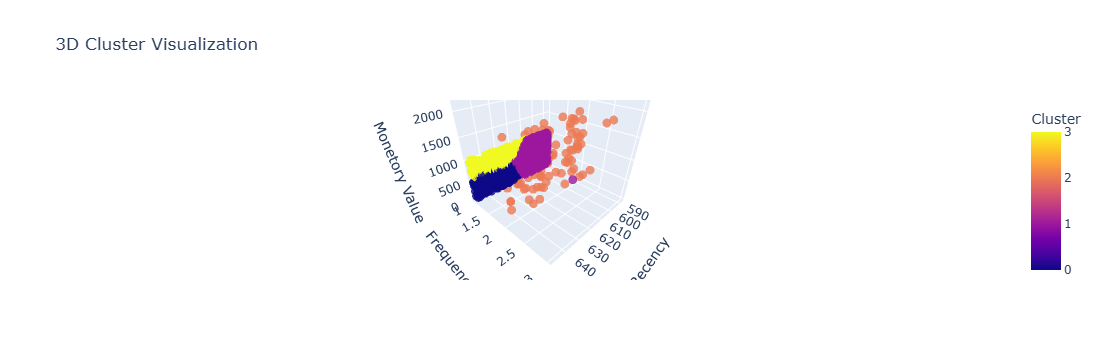

In [78]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(
    df,
    x="Recency",
    y="Frequency",
    z="MonetoryValue",
    color="Cluster",  # Color points based on cluster
    title="3D Cluster Visualization",
    labels={"Recency": "Recency", "Frequency": "Frequency", "MonetoryValue": "Monetory Value"},
    opacity=0.8,
)

# Adjusting layout for better appearance
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
    xaxis_title="Recency",
    yaxis_title="Frequency",
    zaxis_title="Monetory Value"
))

fig.show()


## Cluster Insights:

**Cluster 0**

- Recency: 632.66 (long time since last purchase)
- Frequency: 1.00 (rare buyers)
- MonetaryValue: 259.53 (low spenders)
- Insight: These are infrequent, low-value customers who haven’t engaged recently.

**Cluster 1**

- Recency: 600.57 (long time since last purchase)
- Frequency: 1.00 (rare buyers)
- MonetaryValue: 487.20 (moderate spenders)
- Insight: These customers buy infrequently but spend moderately when they do.

**Cluster 2**

- Recency: 621.41 (long time since last purchase)
- Frequency: 2.09 (occasional buyers)
- MonetaryValue: 1106.81 (high spenders)
- Insight: Slightly more frequent buyers with higher spending.

**Cluster 3**

- Recency: 629.25 (long time since last purchase)
- Frequency: 1.00 (rare buyers)
- MonetaryValue: 765.06 (moderate spenders)
- Insight: Similar to Cluster 1, but with a slightly higher monetary value.

## Recommendations for Clusters:

**Cluster 0**

- Strategy: Re-engage with discounts or incentives.
- Focus: Email marketing, affordability.

**Cluster 1**

- Strategy: Encourage frequent purchases with loyalty programs.
- Focus: Value-added offers, bundling.

**Cluster 2**

- Strategy: Maintain engagement with exclusive deals.
- Focus: Personalized offers, early access.

**Cluster 3**

- Strategy: Boost frequency with targeted promotions.
- Focus: Product recommendations, discounts.